In [2]:
import pandas as pd

In [4]:
distritos_sp = pd.read_csv('distritos_sp.csv')

In [5]:
distritos_sp.head(5)

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994


In [6]:
distritos_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


In [8]:
variaveis_numericas = distritos_sp.drop(['cod_ibge','distritos'],axis=1)

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mapa de Correlação')

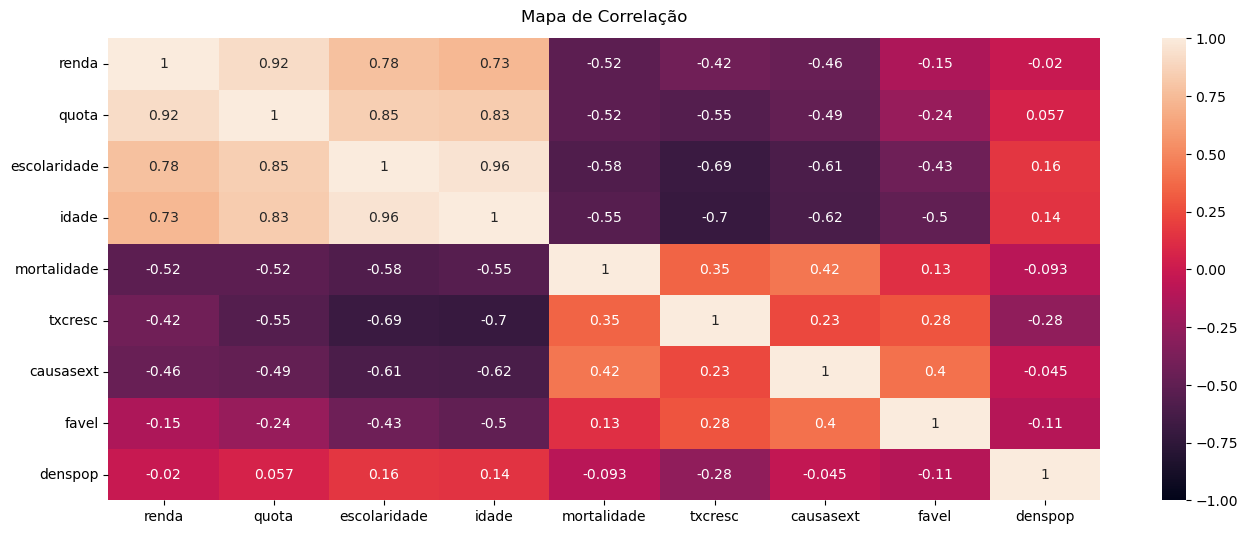

In [12]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(variaveis_numericas.corr(), vmin=-1, vmax=1, annot=True )
heatmap.set_title("Mapa de Correlação",  fontdict={'fontsize': 12} ,pad=12)


In [13]:
!pip install factor_analyzer

In [14]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [15]:
kmo_variaveis, kmo = calculate_kmo(variaveis_numericas)

In [16]:
print(kmo)

0.833091424182929


In [18]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [19]:
qui_quadrado, pvalor = calculate_bartlett_sphericity(variaveis_numericas)

In [20]:
pvalor < 0.05

np.True_

In [21]:
print(pvalor)

5.607017481838534e-134


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
colunas_numericas = variaveis_numericas.columns
colunas_numericas

Index(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade', 'txcresc',
       'causasext', 'favel', 'denspop'],
      dtype='object')

In [27]:
padronizar = StandardScaler()
variaveis_numericas = padronizar.fit_transform(variaveis_numericas)
variaveis_numericas 

array([[ 1.08502328e-01,  1.80715140e-01,  5.23096244e-01,
         1.05541274e+00, -4.29281808e-01, -5.38805723e-01,
        -7.80681293e-01, -7.56406323e-01,  5.21804668e-01],
       [ 2.40630528e+00,  1.98438577e+00,  1.32019516e+00,
         1.28464265e+00, -1.47188596e+00, -7.33574170e-01,
        -1.40197826e+00, -6.68425227e-01, -8.57183702e-01],
       [-7.90322801e-01, -1.13342509e+00, -1.27037668e+00,
        -1.00765651e+00, -1.27369371e-01,  5.17822174e+00,
        -2.08708641e+00, -7.56406323e-01, -1.84993379e+00],
       [-5.64581006e-01, -4.12654904e-01, -2.74002674e-01,
        -9.07368417e-02,  4.90544879e-01, -3.18259087e-01,
         2.21327218e-01, -7.04087705e-02,  7.83822446e-01],
       [-6.29818314e-01, -6.35605024e-01, -7.47280632e-02,
        -9.07368417e-02,  7.52202169e-01, -4.12779054e-01,
        -1.65420498e-01, -2.32344990e-01,  1.36865133e+00],
       [ 5.20636431e-01,  1.67189899e-01,  9.21645940e-01,
         8.26182822e-01, -1.48396254e+00, -6.247330

In [28]:
dados_padronizados = pd.DataFrame(variaveis_numericas, columns= colunas_numericas)
dados_padronizados.head()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651


In [29]:
from sklearn.decomposition import PCA

In [30]:
n_fatores = dados_padronizados.shape[1]
n_fatores

9

In [31]:
pca = PCA(n_components=n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=9)

## pca.explained_variance_ratio_ = nos dá a porcentagem de variância explicada por cada um dos fatores gerados pela análise de componentes principais.

In [32]:
pca.explained_variance_ratio_

array([0.55067008, 0.1293709 , 0.11070601, 0.08045185, 0.05881136,
       0.04425824, 0.01440763, 0.00722961, 0.00409432])

In [33]:
!pip install plotly

In [34]:
import plotly.express as px
%matplotlib inline
import plotly.io as pio
pio.renderers.default = 'iframe'


In [35]:
def addLabel(x,y):
    for i in range(len(x)):
        plt.text(i, y[i],y[i], ha="center")
        

In [39]:
fatores = [f'F{i+1}' for i in range(n_fatores)]
fatores

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

In [36]:
import matplotlib.pyplot as plt 


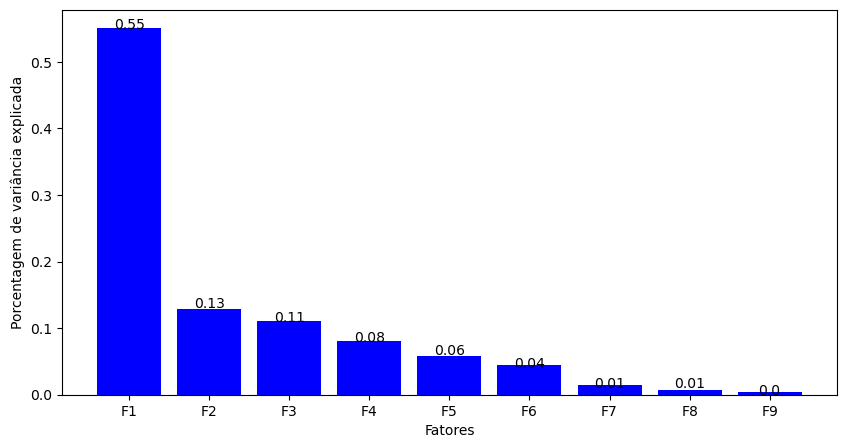

In [41]:
fig = plt.figure(figsize=(10,5))
x = fatores
y = pca.explained_variance_ratio_
plt.bar(x,y, color='blue', width=0.8)

for i in range(len(x)):
    plt.text(i, np.around(y[i], decimals = 2), np.around(y[i], decimals = 2), ha = 'center')

plt.xlabel("Fatores")
plt.ylabel("Porcentagem de variância explicada")
plt.show()

In [42]:
fig = px.bar(x = fatores, y = pca.explained_variance_ratio_, text = np.around(pca.explained_variance_ratio_, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

In [47]:
variancia_acumulada = [sum(pca.explained_variance_ratio_[0: i+1]) for i in range(n_fatores)]
variancia_acumulada

[np.float64(0.5506700772160417),
 np.float64(0.6800409820794436),
 np.float64(0.7907469955852218),
 np.float64(0.8711988432249139),
 np.float64(0.9300102025439662),
 np.float64(0.9742684414070405),
 np.float64(0.9886760753033329),
 np.float64(0.9959056848263386),
 np.float64(1.0)]

In [48]:
fig = px.bar(x = fatores, y = variancia_acumulada, text = np.around(variancia_acumulada, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

`pca.explained_variance_` representam a quantidade de variáveis explicadas por cada um dos fatores.
O valor mais exato pode ser obtido multiplicando a `pca.explained_variance_ratio_` pela quantidade de fatores.

In [49]:
pca.explained_variance_

array([5.00819944, 1.17659433, 1.00684206, 0.73168838, 0.53487384,
       0.40251704, 0.13103364, 0.0657514 , 0.03723672])

In [50]:
pca.explained_variance_ratio_ * n_fatores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

In [51]:
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_fatores))

9.094736842105258
9.0


In [52]:
autovalores = pca.explained_variance_ratio_ * n_fatores

In [53]:
autovalores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

## O critério de escolha da quantidade de fatores, em que são levados em consideração apenas os fatores correspondentes a autovalores maiores que 1, é comumente utilizado e conhecido por critério da raiz latente ou critério de Kaiser.

In [55]:
fatores_selecionados = ['Fator Selecionado' if autovalor > 1 else 'Fator Nao Selecionado' for autovalor in autovalores]
fatores_selecionados

['Fator Selecionado',
 'Fator Selecionado',
 'Fator Nao Selecionado',
 'Fator Nao Selecionado',
 'Fator Nao Selecionado',
 'Fator Nao Selecionado',
 'Fator Nao Selecionado',
 'Fator Nao Selecionado',
 'Fator Nao Selecionado']

In [56]:
fig = px.bar(x = range(1,10), y = autovalores, text = np.around(autovalores, decimals = 2),
             title = 'Scree Plot', color = fatores_selecionados)
fig.update_layout(yaxis = {'title': 'Quantidade de variáveis explicadas', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Autovalor', 'tickfont': {'size': 15}},
                  title = {'font':{'size':25}})
fig.show()

In [58]:
resumo = pd.DataFrame({'Fator': fatores, 'Autovalor': autovalores, 'Variancia Explicada': pca.explained_variance_ratio_, 'Variancia Acumulada': variancia_acumulada  })

In [60]:
resumo

,Fator,Autovalor,Variancia Explicada,Variancia Acumulada
0,F1,4.956031,0.550670,0.550670
1,F2,1.164338,0.129371,0.680041
2,F3,0.996354,0.110706,0.790747
3,F4,0.724067,0.080452,0.871199
4,F5,0.529302,0.058811,0.930010
5,F6,0.398324,0.044258,0.974268
6,F7,0.129669,0.014408,0.988676
7,F8,0.065066,0.007230,0.995906
8,F9,0.036849,0.004094,1.000000


### Os pesos que cada variável tem em cada componente principal obtido pela PCA pode ser obtido através de pca.components_, são os autovetores extraídos da matriz de correlação

In [64]:
pd.DataFrame(pca.components_, columns = colunas_numericas, index = [f'Autovetor {i+1}' for i in range(n_fatores)])

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
Autovetor 1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
Autovetor 2,-0.341942,-0.209864,0.022792,0.060653,0.163695,-0.312726,0.040693,-0.410400,0.734953
Autovetor 3,0.172958,0.155014,0.009357,-0.063483,-0.173795,-0.277756,0.439119,0.688140,0.410151
Autovetor 4,0.063391,0.139963,0.084585,0.126908,0.580196,-0.453115,0.490352,-0.158792,-0.381486
Autovetor 5,0.342004,0.277961,0.003884,-0.031407,0.681132,0.350104,-0.289687,0.146396,0.336014
Autovetor 6,0.307190,0.212669,-0.051763,-0.065073,-0.214495,0.467020,0.586419,-0.467725,0.163471
Autovetor 7,-0.357319,-0.147798,0.531450,0.535113,0.088293,0.423005,0.216760,0.219039,0.001545
Autovetor 8,-0.564954,0.740900,-0.332142,0.128794,-0.043236,0.046332,-0.022126,0.019462,-0.010178
Autovetor 9,0.226373,-0.235400,-0.638974,0.694279,-0.002605,0.004163,0.011863,0.045723,0.027849


In [67]:
raiz_autovalores = np.sqrt(autovalores)

In [68]:
cargas_fatoriais = pd.DataFrame(pca.components_.T * raiz_autovalores, columns=fatores, index = colunas_numericas)
cargas_fatoriais

,F1,F2,F3,F4,F5,F6,F7,F8,F9
renda,0.832127,-0.368971,0.172642,0.053941,0.248819,0.193877,-0.128669,-0.144109,0.043455
quota,0.900606,-0.226453,0.154732,0.119098,0.202225,0.134222,-0.053221,0.188990,-0.045188
escolaridade,0.966543,0.024594,0.009340,0.071975,0.002826,-0.032669,0.191373,-0.084723,-0.122658
idade,0.960135,0.065447,-0.063367,0.107989,-0.022849,-0.041070,0.192692,0.032853,0.133274
mortalidade,-0.655699,0.176634,-0.173478,0.493701,0.495545,-0.135374,0.031794,-0.011029,-0.000500
txcresc,-0.696781,-0.337446,-0.277249,-0.385565,0.254712,0.294750,0.152322,0.011818,0.000799
causasext,-0.666578,0.043910,0.438317,0.417250,-0.210756,0.370106,0.078054,-0.005644,0.002277
favel,-0.457185,-0.442840,0.686884,-0.135120,0.106508,-0.295195,0.078875,0.004964,0.008777
denspop,0.166281,0.793048,0.409402,-0.324614,0.244461,0.103171,0.000556,-0.002596,0.005346


In [69]:
resumos_cargas_fatoriais = cargas_fatoriais[['F1','F2']].copy()
resumos_cargas_fatoriais

,F1,F2
renda,0.832127,-0.368971
quota,0.900606,-0.226453
escolaridade,0.966543,0.024594
idade,0.960135,0.065447
mortalidade,-0.655699,0.176634
txcresc,-0.696781,-0.337446
causasext,-0.666578,0.043910
favel,-0.457185,-0.442840
denspop,0.166281,0.793048


In [70]:
fig = px.scatter(cargas_fatoriais, x = 'F1', y = 'F2', text = cargas_fatoriais.index)
fig.update_traces(textposition = 'top center')

### Verificando as comunalidades de cada uma das variáveis

As comunalidades representam a variância total compartilhada de cada uma das variáveis originais com todos os fatores extraídos.

In [73]:
resumos_cargas_fatoriais['Comunalidades'] = (resumos_cargas_fatoriais ** 2).sum(axis=1)

In [74]:
resumos_cargas_fatoriais

,F1,F2,Comunalidades
renda,0.832127,-0.368971,0.828575
quota,0.900606,-0.226453,0.862372
escolaridade,0.966543,0.024594,0.934811
idade,0.960135,0.065447,0.926143
mortalidade,-0.655699,0.176634,0.461141
txcresc,-0.696781,-0.337446,0.599374
causasext,-0.666578,0.043910,0.446254
favel,-0.457185,-0.442840,0.405126
denspop,0.166281,0.793048,0.656574


In [75]:
pca2 = PCA(n_components = 2)
pd.DataFrame(pca2.fit_transform(dados_padronizados), columns = ['F1', 'F2'])

,F1,F2
0,1.519105,0.761299
1,3.985600,-1.555514
2,-2.681205,-2.356295
3,-0.574202,1.061710
4,-0.457007,1.688282
...,...,...
91,-0.222504,1.876371
92,0.651970,0.175635
93,0.452520,-1.141560
94,-0.262248,-0.698634


## SCORES FATORIAIS

In [76]:
raiz_autovalores

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

In [92]:
scores_fatoriais = np.zeros(pca.components_.shape)
for i in range(len(pca.components_)):
    scores_fatoriais[i] = pca.components_[i]/ raiz_autovalores[i]
     

In [93]:
scores_fatoriais

array([[ 0.16790189,  0.18171917,  0.19502366,  0.19373066, -0.13230331,
        -0.14059264, -0.13449826, -0.09224829,  0.0335513 ],
       [-0.31689332, -0.19449089,  0.02112244,  0.05620973,  0.15170332,
        -0.2898178 ,  0.0377124 , -0.38033608,  0.68111471],
       [ 0.1732738 ,  0.1552978 ,  0.00937442, -0.06359926, -0.17411264,
        -0.27826353,  0.43992125,  0.68939795,  0.4109005 ],
       [ 0.07449723,  0.16448449,  0.09940371,  0.14914211,  0.68184425,
        -0.53249994,  0.5762597 , -0.18661238, -0.448321  ],
       [ 0.47008802,  0.38205999,  0.00533851, -0.04316882,  0.93622359,
         0.48122231, -0.39817738,  0.20122318,  0.46185453],
       [ 0.48673063,  0.33696555, -0.08201647, -0.10310639, -0.33985956,
         0.73997522,  0.92915851, -0.74109174,  0.25901285],
       [-0.99228938, -0.4104418 ,  1.47585803,  1.48603139,  0.2451938 ,
         1.17470224,  0.6019508 ,  0.60828084,  0.00429124],
       [-2.21480047,  2.90456349, -1.30210199,  0.50491194, -0

In [96]:
F1 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F1 += scores_fatoriais[0][indice] * dados_padronizados[variavel]

In [98]:
F2 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F2 += scores_fatoriais[1][indice] * dados_padronizados[variavel]

In [100]:
dados_fatoriais = distritos_sp[['cod_ibge','distritos']].copy()
dados_fatoriais['F1'] = F1
dados_fatoriais['F2'] = F2
dados_fatoriais

,cod_ibge,distritos,F1,F2
0,1,Água Rasa,0.682371,0.705531
1,12,Alto de Pinheiros,1.790304,-1.441565
2,23,Anhanguera,-1.204379,-2.183685
3,34,Aricanduva,-0.257928,0.983935
4,45,Artur Alvim,-0.205284,1.564607
...,...,...,...,...
91,92,Vila Medeiros,-0.099947,1.738918
92,93,Vila Prudente,0.292861,0.162769
93,94,Vila Sônia,0.203269,-1.057936
94,95,São Domingos,-0.117800,-0.647456


In [101]:
dados_fatoriais['Rankings'] = dados_fatoriais['F1'] * pca.explained_variance_ratio_[0] +   dados_fatoriais['F2'] * pca.explained_variance_ratio_[1]
dados_fatoriais

,cod_ibge,distritos,F1,F2,Rankings
0,1,Água Rasa,0.682371,0.705531,0.467037
1,12,Alto de Pinheiros,1.790304,-1.441565,0.799370
2,23,Anhanguera,-1.204379,-2.183685,-0.945721
3,34,Aricanduva,-0.257928,0.983935,-0.014740
4,45,Artur Alvim,-0.205284,1.564607,0.089371
...,...,...,...,...,...
91,92,Vila Medeiros,-0.099947,1.738918,0.169927
92,93,Vila Prudente,0.292861,0.162769,0.182327
93,94,Vila Sônia,0.203269,-1.057936,-0.024932
94,95,São Domingos,-0.117800,-0.647456,-0.148631


In [102]:
dados_fatoriais.sort_values('Rankings', ascending = False)

,cod_ibge,distritos,F1,F2,Rankings
44,40,Jardim Paulista,2.466536,-0.493433,1.294412
25,19,Consolação,1.756716,0.516640,1.034209
59,57,Perdizes,1.709717,0.398168,0.993001
89,90,Vila Mariana,1.644220,0.071416,0.914662
6,67,Bela Vista,1.154891,2.109205,0.908833
...,...,...,...,...,...
32,27,Iguatemi,-1.590473,-0.734440,-0.970841
42,38,Jardim Ângela,-1.684687,-0.777432,-1.028284
54,51,Parelheiros,-1.635739,-1.583519,-1.105614
51,48,Marsilac,-2.051923,-0.194613,-1.155110


In [103]:
distritos_sp['Rankings'] =  dados_fatoriais['Rankings']

In [105]:
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,Rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.467037
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,0.799370
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-0.945721
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.014740
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,0.089371
...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,0.169927
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.182327
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,-0.024932
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,-0.148631


In [106]:
conda install -c conda-forge geopandas

Channels:
 - conda-forge
Platform: linux-aarch64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [107]:
!pip install geopandas

In [108]:
import geopandas as gpd

In [109]:
dados_mapa = gpd.read_file('SIRGAS_SHP_distrito/SIRGAS_SHP_distrito.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [111]:
dados_mapa.set_crs(epsg = 31983, inplace = True)

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,MARSILAC,52,20,PARELHEIROS,MAR,2.081957e+08,208.196,"POLYGON ((336124.09 7355302.282, 336121.755 73..."
2,MOEMA,32,12,VILA MARIANA,MOE,9.079516e+06,9.080,"POLYGON ((331242.174 7392162.324, 331244.581 7..."
3,ARTUR ALVIM,5,21,PENHA,AAL,6.508361e+06,6.508,"POLYGON ((349416.226 7397718.808, 349416.884 7..."
4,IGUATEMI,33,30,SAO MATEUS,IGU,1.958356e+07,19.584,"POLYGON ((350859.949 7389599.855, 350880.182 7..."
...,...,...,...,...,...,...,...,...
91,CAMPO LIMPO,17,17,CAMPO LIMPO,CLM,1.259634e+07,12.596,"POLYGON ((321265.375 7388006.57, 321292.309 73..."
92,JAGUARE,41,08,LAPA,JRE,6.579876e+06,6.580,"POLYGON ((322952.516 7394978.618, 323250.62 73..."
93,JARAGUA,42,02,PIRITUBA-JARAGUA,JAR,2.833031e+07,28.330,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
94,JARDIM HELENA,44,23,SAO MIGUEL,JDH,9.148559e+06,9.149,"POLYGON ((352915.621 7402621.049, 352944.248 7..."


<Axes: >

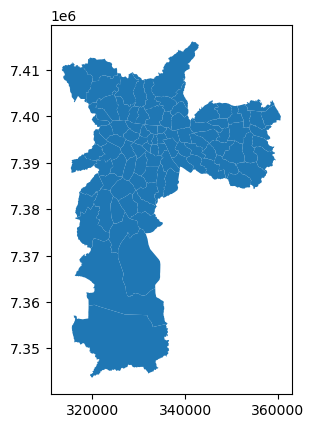

In [112]:
dados_mapa.plot()

In [114]:
distritos_sp = distritos_sp.sort_values('cod_ibge')
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,Rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.860000,-1.84,52.980000,0.00,125.610001,0.467037
9,2,Brás,1942,28.969999,7.0,30,13.640000,-4.48,120.669998,0.00,76.190002,0.110065
10,3,Brasilândia,975,8.220000,5.8,22,22.000000,3.14,125.019997,16.60,112.059998,-0.837465
11,4,Butantã,2311,50.320000,8.4,31,18.129999,-1.60,44.730000,0.26,42.820000,0.387477
12,5,Cachoeirinha,1347,12.340000,6.2,23,15.710000,2.28,105.599998,17.42,105.919998,-0.604258
...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.430000,-1.41,77.980003,2.49,188.929993,0.169927
92,93,Vila Prudente,1755,32.080002,7.2,30,14.360000,-2.55,66.510002,7.43,101.440002,0.182327
93,94,Vila Sônia,2970,41.410000,7.4,27,16.760000,-0.90,74.680000,14.93,80.120003,-0.024932
94,95,São Domingos,2047,23.510000,6.8,26,14.300000,0.71,62.349998,8.55,72.919998,-0.148631


In [115]:
!pip install  unidecode

In [116]:
from unidecode import unidecode 

In [117]:
nomes_distritos = [unidecode(distrito).upper() for distrito in distritos_sp['distritos']]
nomes_distritos

['AGUA RASA',
 'BRAS',
 'BRASILANDIA',
 'BUTANTA',
 'CACHOEIRINHA',
 'CAMBUCI',
 'CAMPO BELO',
 'CAMPO GRANDE',
 'CAMPO LIMPO',
 'CANGAIBA',
 'CAPAO REDONDO',
 'ALTO DE PINHEIROS',
 'CARRAO',
 'CASA VERDE',
 'CIDADE ADEMAR',
 'CIDADE DUTRA',
 'CIDADE LIDER',
 'CIDADE TIRADENTES',
 'CONSOLACAO',
 'CURSINO',
 'ERMELINO MATARAZZO',
 'FREGUESIA DO O',
 'ANHANGUERA',
 'GRAJAU',
 'GUAIANASES',
 'MOEMA',
 'IGUATEMI',
 'IPIRANGA',
 'ITAIM BIBI',
 'ITAIM PAULISTA',
 'ITAQUERA',
 'JABAQUARA',
 'JACANA',
 'ARICANDUVA',
 'JAGUARA',
 'JAGUARE',
 'JARAGUA',
 'JARDIM ANGELA',
 'JARDIM HELENA',
 'JARDIM PAULISTA',
 'JARDIM SAO LUIS',
 'JOSE BONIFACIO',
 'LAPA',
 'LIBERDADE',
 'ARTUR ALVIM',
 'LIMAO',
 'MANDAQUI',
 'MARSILAC',
 'MOOCA',
 'MORUMBI',
 'PARELHEIROS',
 'PARI',
 'PARQUE DO CARMO',
 'PEDREIRA',
 'PENHA',
 'BARRA FUNDA',
 'PERDIZES',
 'PERUS',
 'PINHEIROS',
 'PIRITUBA',
 'PONTE RASA',
 'RAPOSO TAVARES',
 'REPUBLICA',
 'RIO PEQUENO',
 'SARCOMA',
 'SANTA CECILIA',
 'BELA VISTA',
 'SANTANA',
 'S

In [118]:
distritos_sp['nomes_distrito'] = nomes_distritos

In [121]:
distritos_distintos = distritos_sp['nomes_distrito'].values != dados_mapa['ds_nome'].values
distritos_distintos.sum()

np.int64(96)

In [122]:
distritos_sp.replace({'SARCOMA':'SACOMA', 'Sarcomã':'Sacoma'}, inplace = True)

In [124]:
dados_completos = dados_mapa.merge(distritos_sp, left_on='ds_nome', right_on='nomes_distrito')
dados_completos

,ds_nome,ds_codigo,ds_cd_sub,ds_subpref,ds_sigla,ds_areamt,ds_areakm,geometry,cod_ibge,distritos,...,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,Rankings,nomes_distrito
0,MANDAQUI,51,05,SANTANA-TUCURUVI,MAN,1.324786e+07,13.248,"POLYGON ((330950.373 7407837.176, 330952.177 7...",47,Mandaqui,...,25.200001,7.6,28,14.840000,-0.40,51.459999,0.42,77.839996,0.170769,MANDAQUI
1,MARSILAC,52,20,PARELHEIROS,MAR,2.081957e+08,208.196,"POLYGON ((336124.09 7355302.282, 336121.755 73...",48,Marsilac,...,0.610000,4.8,20,44.250000,4.36,65.809998,0.00,0.370000,-1.155110,MARSILAC
2,MOEMA,32,12,VILA MARIANA,MOE,9.079516e+06,9.080,"POLYGON ((331242.174 7392162.324, 331244.581 7...",26,Moema,...,83.690002,8.6,34,8.540000,-0.83,35.750000,0.00,82.410004,0.906727,MOEMA
3,ARTUR ALVIM,5,21,PENHA,AAL,6.508361e+06,6.508,"POLYGON ((349416.226 7397718.808, 349416.884 7...",45,Artur Alvim,...,15.910000,7.0,27,19.730000,-1.40,67.250000,4.11,167.399994,0.089371,ARTUR ALVIM
4,IGUATEMI,33,30,SAO MATEUS,IGU,1.958356e+07,19.584,"POLYGON ((350859.949 7389599.855, 350880.182 7...",27,Iguatemi,...,4.840000,5.4,21,19.610001,8.47,99.449997,3.26,45.830002,-0.970841,IGUATEMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,CAMPO LIMPO,17,17,CAMPO LIMPO,CLM,1.259634e+07,12.596,"POLYGON ((321265.375 7388006.57, 321292.309 73...",9,Campo Limpo,...,15.160000,6.4,24,17.879999,0.33,71.750000,13.65,126.639999,-0.319114,CAMPO LIMPO
92,JAGUARE,41,08,LAPA,JRE,6.579876e+06,6.580,"POLYGON ((322952.516 7394978.618, 323250.62 73...",36,Jaguaré,...,32.869999,7.0,26,10.820000,-4.04,83.750000,26.73,54.700001,-0.233375,JAGUARE
93,JARAGUA,42,02,PIRITUBA-JARAGUA,JAR,2.833031e+07,28.330,"POLYGON ((319172.403 7405179.204, 319174.204 7...",37,Jaraguá,...,9.880000,6.2,23,19.270000,4.18,84.489998,6.21,41.439999,-0.660623,JARAGUA
94,JARDIM HELENA,44,23,SAO MIGUEL,JDH,9.148559e+06,9.149,"POLYGON ((352915.621 7402621.049, 352944.248 7...",39,Jardim Helena,...,9.220000,5.6,21,17.129999,3.06,75.669998,12.70,151.210007,-0.550320,JARDIM HELENA


In [125]:
dados_completos['coords'] = dados_completos['geometry'].apply(lambda x: x.representative_point().coords[0])

(np.float64(311028.2445915086),
 np.float64(362979.62402979465),
 np.float64(7340122.141582586),
 np.float64(7419777.028684506))

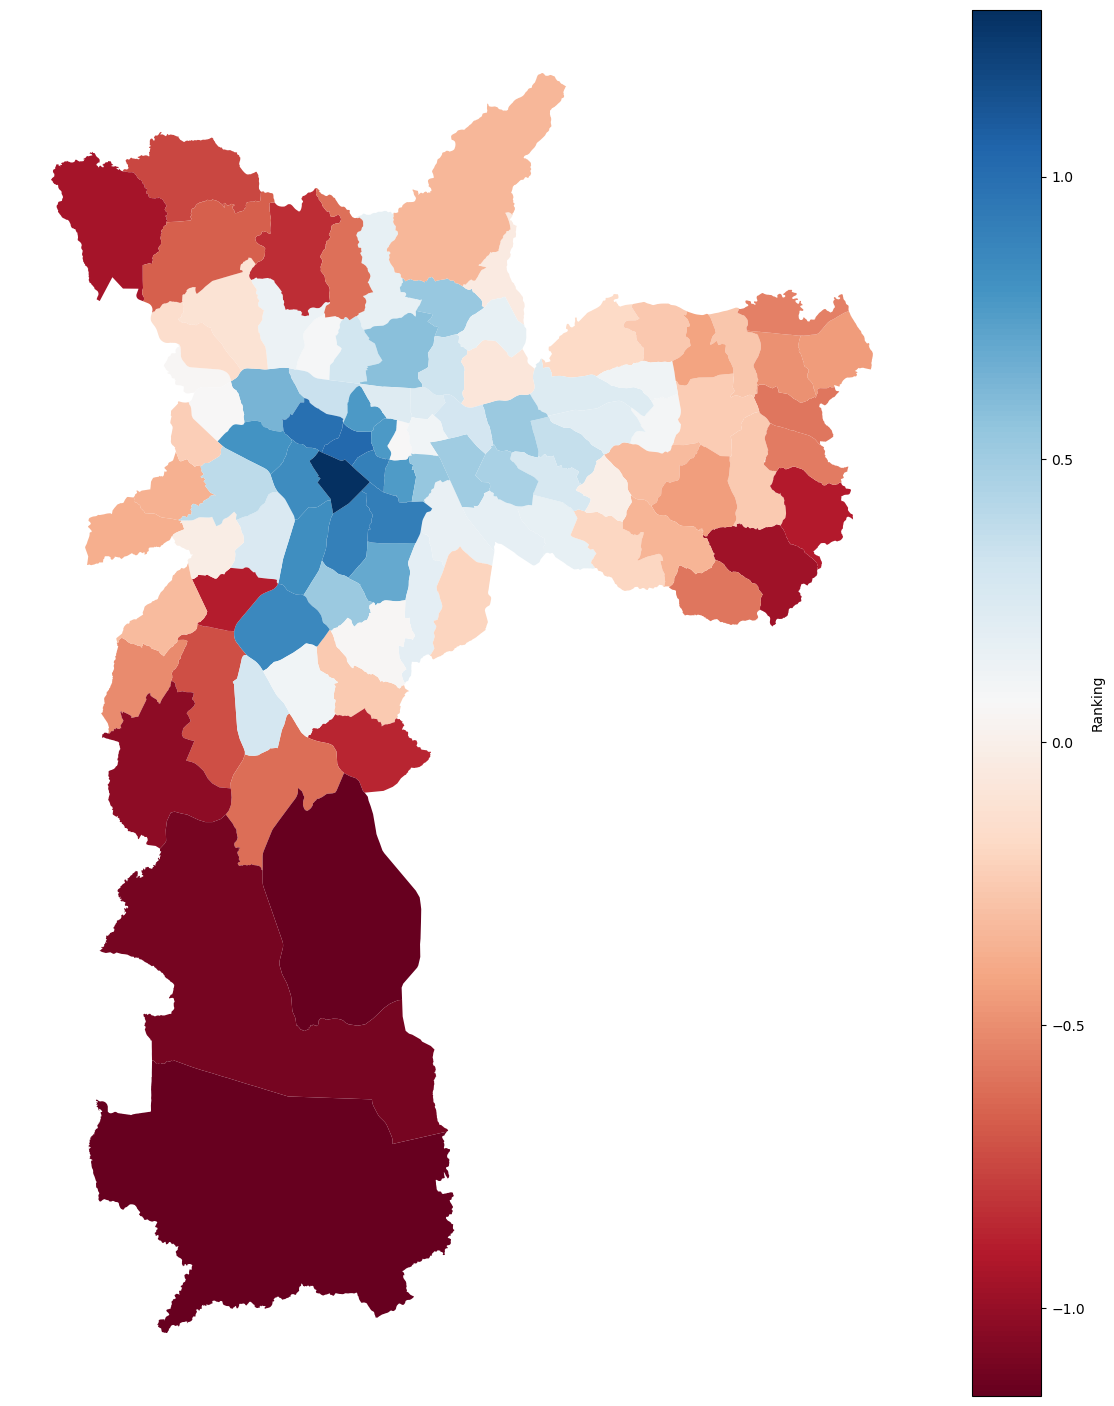

In [127]:
dados_completos.plot(column = 'Rankings', legend = True, 
                     legend_kwds = {'label': 'Ranking', 'orientation':'vertical'},
                     cmap = 'RdBu', figsize = (15,18))
plt.axis('off')